In [1]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import pandas as pd
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [16]:
import requests
from bs4 import BeautifulSoup

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        revenue_table = table
        break
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            tesla_revenue = pd.concat(
                [tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

tesla_revenue.tail()


,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
61,2009-09-30,46
62,2009-06-30,27


In [18]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [20]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:
            gme_revenue = pd.concat(
                [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                ignore_index=True
            )

gme_revenue.tail()


,Date,Revenue
61,2010-01-31,3524
62,2009-10-31,1835
63,2009-07-31,1739
64,2009-04-30,1981
65,2009-01-31,3492


In [34]:
import matplotlib.pyplot as plt
import pandas as pd

def make_graph(stock_df, revenue_df, title):
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])
    stock_df["Date"] = pd.to_datetime(stock_df["Date"])
    revenue_df["Revenue"] = pd.to_numeric(revenue_df["Revenue"], errors='coerce')
    revenue_df = revenue_df.sort_values("Date")
    stock_df = stock_df.sort_values("Date")
    fig, ax1 = plt.subplots(figsize=(14, 5))

    ax1.plot(stock_df["Date"], stock_df["Close"], color="blue", label="Stock Price")
    ax1.set_ylabel("Stock Price (USD)", color="blue")
    ax1.set_xlabel("Date")
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_df["Date"], revenue_df["Revenue"], color="red", label="Revenue")
    ax2.set_ylabel("Revenue (USD)", color="red")
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title(title)
    fig.tight_layout()
    plt.show()


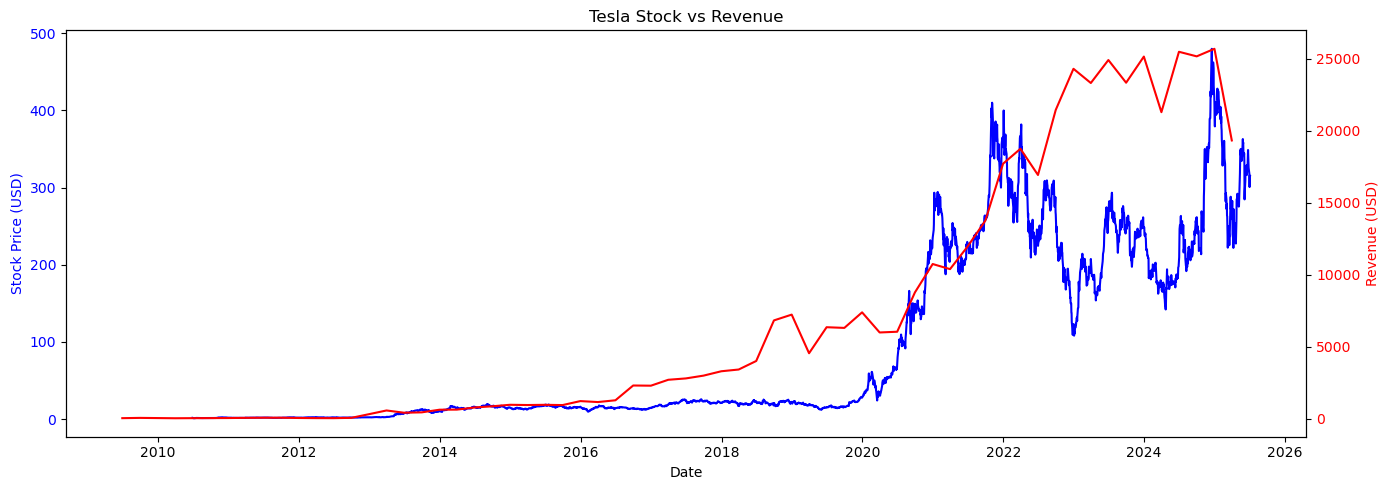

In [36]:
make_graph(tesla_data, tesla_revenue, "Tesla Stock vs Revenue")


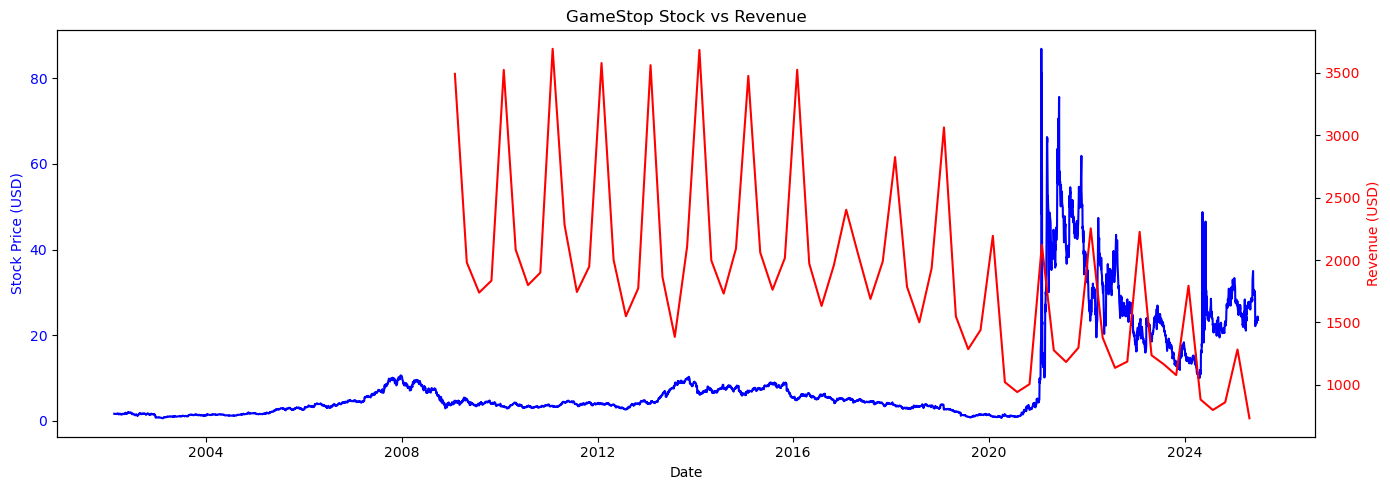

In [38]:
make_graph(gme_data, gme_revenue, "GameStop Stock vs Revenue")
